In [126]:
import pandas as pd
import numpy as np
import tensorflow 
import keras 
import sklearn
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import linear_model 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.utils import shuffle
from sklearn import linear_model, preprocessing
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler, OneHotEncoder, MaxAbsScaler

In [145]:
df = pd.read_csv('RB_history.csv')
df

,Player,ID,Team,Team Number,Points,Salary,Value,Week
0,Chase Edmonds,21,ARI,1,13.5,5000,0.002700,1
1,Chase Edmonds,21,ARI,1,4.3,4600,0.000935,2
2,Chase Edmonds,21,ARI,1,5.4,4600,0.001174,3
3,Chase Edmonds,21,ARI,1,15.0,4200,0.003571,4
4,Chase Edmonds,21,ARI,1,20.2,4700,0.004298,5
...,...,...,...,...,...,...,...,...
658,Salvon Ahmed,103,MIA,32,16.0,4000,0.004000,10
659,Salvon Ahmed,103,MIA,32,12.4,4800,0.002583,11
660,Samaje Perine,104,CIN,31,10.4,4000,0.002600,8
661,Samaje Perine,104,CIN,31,6.5,4000,0.001625,10


In [146]:
data = df[["ID","Points", "Team Number", "Salary","Value"]]
data

,ID,Points,Team Number,Salary,Value
0,21,13.5,1,5000,0.002700
1,21,4.3,1,4600,0.000935
2,21,5.4,1,4600,0.001174
3,21,15.0,1,4200,0.003571
4,21,20.2,1,4700,0.004298
...,...,...,...,...,...
658,103,16.0,32,4000,0.004000
659,103,12.4,32,4800,0.002583
660,104,10.4,31,4000,0.002600
661,104,6.5,31,4000,0.001625


In [147]:
x = data.drop(["Points"], axis=1)
y = data.Points


In [148]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2, random_state=42)

In [149]:
scaler = MinMaxScaler()
x_scaler = scaler.fit(x_train)

y_train = y_train.values.reshape(-1,1)
y_scaler = scaler.fit(y_train)

y_test = y_test.values.reshape(-1,1)

x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
x_train_scaled

array([[ 3.41666667e-01,  2.91666667e-02,  8.33208333e+01,
        -1.24765625e-02],
       [ 1.34166667e+00,  2.58333333e-01,  8.33208333e+01,
        -1.24713542e-02],
       [ 2.05000000e+00,  3.83333333e-01,  8.33208333e+01,
        -1.23187500e-02],
       ...,
       [ 5.08333333e-01,  2.79166667e-01,  1.39570833e+02,
        -1.24350124e-02],
       [ 8.20833333e-01,  4.25000000e-01,  8.54041667e+01,
        -1.24791667e-02],
       [ 6.95833333e-01,  1.12500000e-01,  1.22904167e+02,
        -1.24703390e-02]])

In [150]:
x_train.shape, y_train.shape

((530, 4), (530, 1))

In [151]:
x_test.shape, y_test.shape

((133, 4), (133, 1))

In [152]:
model = linear_model.LinearRegression()

In [153]:
model.fit(x_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [154]:
y_pred = model.predict(x_test_scaled)

print(model.score(x_test_scaled, y_test_scaled)) #evaluate the model 

0.9581078067668976


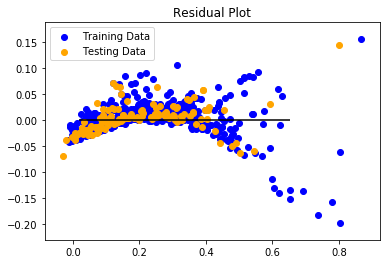

In [155]:
predictions = model.predict(x_test_scaled)
model.fit(x_train_scaled, y_train_scaled)
plt.scatter(model.predict(x_train_scaled), model.predict(x_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(x_test_scaled), model.predict(x_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [156]:
# print(f"First 10 Predictions:   {predictions[:10]}")
# print(f"First 10 Actual stats: {y_test_scaled[:10]}")

In [157]:
actual = y_scaler.inverse_transform(y_test_scaled)
final_prediction = y_scaler.inverse_transform(predictions)
ID = x_scaler.inverse_transform(x_test_scaled)

In [158]:
df2 = pd.read_csv('RB_test.csv')
df2

,Name,ID,FFt,ESPN,Awesomeo,Points,Team,Team Number,Salary,Value
0,Ezekiel Elliott,43,16.2,15.22,18.12,16.513333,DAL,8,6800,0.002428
1,Antonio Gibson,13,14.1,15.34,14.36,14.600000,WAS,29,6000,0.002433
2,Duke Johnson,42,7.3,14.59,15.84,12.576667,HOU,12,5700,0.002206
3,J.D. McKissic,48,6.9,12.99,12.70,10.863333,WAS,29,5100,0.002130
4,Adrian Peterson,2,13.6,11.73,12.12,12.483333,DET,10,4700,0.002656
5,Kerryon Johnson,73,5.0,12.89,10.31,9.400000,DET,10,4300,0.002186
6,Tony Pollard,110,2.6,6.35,7.98,5.643333,DAL,8,4000,0.001411


In [159]:
df2 = df2[["ID","Points", "Team Number", "Salary","Value"]]
df2

,ID,Points,Team Number,Salary,Value
0,43,16.513333,8,6800,0.002428
1,13,14.600000,29,6000,0.002433
2,42,12.576667,12,5700,0.002206
3,48,10.863333,29,5100,0.002130
4,2,12.483333,10,4700,0.002656
5,73,9.400000,10,4300,0.002186
6,110,5.643333,8,4000,0.001411


In [160]:
x2 = df2.drop(["Points"], axis=1)
y2 = df2.Points

In [161]:
x2_scaled = x_scaler.transform(x2)

In [162]:
predictions_scaled = model.predict(x2_scaled)
final_prediction = y_scaler.inverse_transform(predictions_scaled)
final_prediction

array([[16.52348215],
       [15.10871529],
       [12.95499997],
       [11.30922317],
       [13.26940648],
       [ 9.50151448],
       [ 4.589773  ]])

In [128]:
np.savetxt("foo.csv", final_prediction, delimiter=",")